In [1]:
import pandas as pd

pd.DataFrame([1,2,3],[4,5,6])

,0
4,1
5,2
6,3


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#sk-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#data
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.metrics import recall_score,f1_score,precision_score
from sklearn.metrics import plot_roc_curve

df=pd.read_csv("heart-disease.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


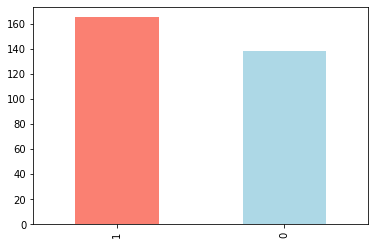

In [3]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


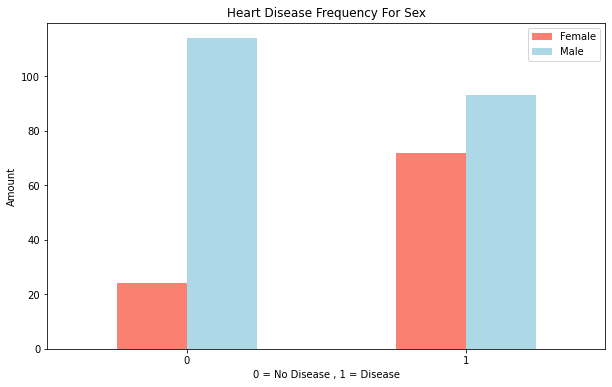

In [8]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);

plt.title("Heart Disease Frequency For Sex");
plt.xlabel("0 = No Disease , 1 = Disease");
plt.ylabel("Amount");
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

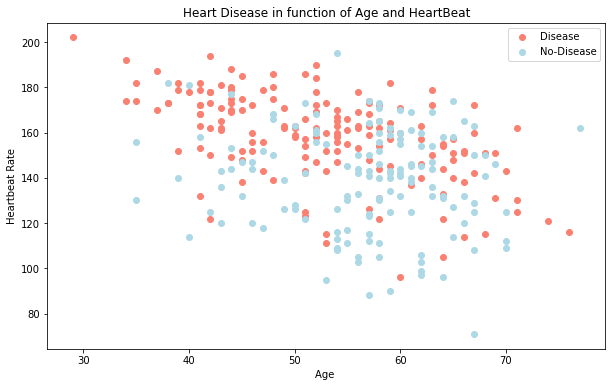

In [9]:
plt.figure(figsize=(10,6))

#scatter with positive
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon");

#scatter with negative example
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue");

plt.title("Heart Disease in function of Age and HeartBeat");
plt.xlabel("Age ");
plt.ylabel("Heartbeat Rate");
plt.legend(["Disease","No-Disease"]);

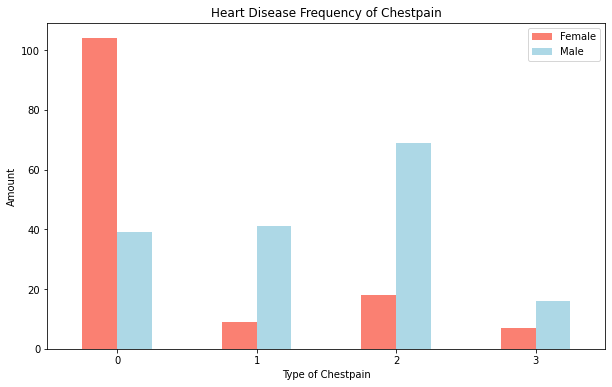

In [10]:
pd.crosstab(df.cp,df.target).plot(kind="bar",color=("salmon","lightblue"),figsize=(10,6));

plt.title("Heart Disease Frequency of Chestpain");
plt.xlabel("Type of Chestpain");
plt.ylabel("Amount");
plt.xticks(rotation=0);
plt.legend(["Female","Male"]);

In [12]:
a=df.corr()

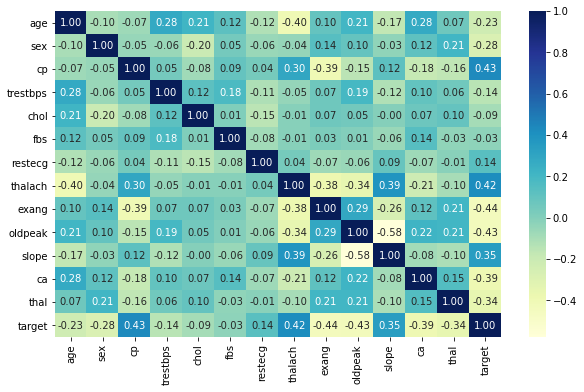

In [13]:
#correlation matrix
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.heatmap(a,annot=True,fmt=".2f",cmap="YlGnBu")

In [10]:
x=df.drop("target",axis=1)
y=df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
# modelling and expriments through RandomizedsearchCV 

#our models : logisticregression and RandomForestClassifier


lg_grid={
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"],
}

np.random.seed(42)

lg_model=RandomizedSearchCV(LogisticRegression(),param_distributions=lg_grid,n_iter=10,cv=5,verbose=True)

lg_model.fit(x_train,y_train)

scores=lg_model.score(x_test,y_test)

print(f"The accuracy score of the Logistic regression {scores*100:.2f}%")

#RandomizedSearchCv through Randomforestclassifier

rs_grid={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None,5,10,20],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}



rs_model=RandomizedSearchCV(RandomForestClassifier(),rs_grid,n_iter=10,cv=5,verbose=True)

rs_model.fit(x_train,y_train)

score_of_rs=rs_model.score(x_test,y_test)

print(f" the accuracy score of Randomforestclassifier {score_of_rs*100:.2f}%")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The accuracy score of the Logistic regression 86.89%
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


 the accuracy score of Randomforestclassifier 88.52%


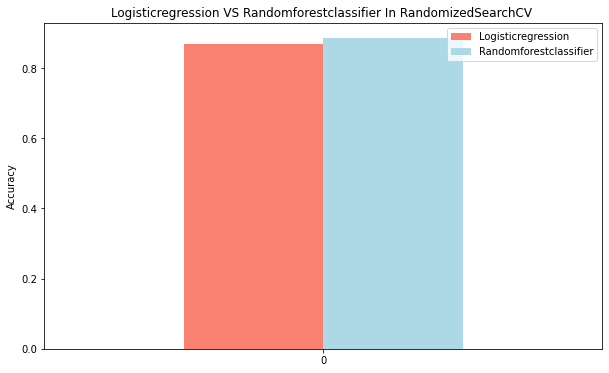

In [12]:
pd.DataFrame({'Logisticregression':scores,'Randomforestclassifier':score_of_rs},index=[0]).plot(kind="bar",color=["salmon","lightblue"],figsize=(10,6));

plt.title("Logisticregression VS Randomforestclassifier In RandomizedSearchCV ");
plt.ylabel("Accuracy");
plt.xticks(rotation=0);


In [13]:
#Logisticregression VS Randomforestclassifier In GridsearchCV

#logisticregression

lg_grid={
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"],
}

np.random.seed(42);

model1=GridSearchCV(LogisticRegression(),param_grid=lg_grid,cv=5,verbose=True)

model1.fit(x_train,y_train)

scores_2=model1.score(x_test,y_test)

print(f"The accuracy score of the Logistic regression {scores_2*100:.2f}%");


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The accuracy score of the Logistic regression 85.25%


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [14]:

#Randomforestclassifier

rs_grid={
    "n_estimators":[10,100],
    "max_depth":[None,5,10,20],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}

np.random.seed(42);

model2=GridSearchCV(RandomForestClassifier(),param_grid=rs_grid,cv=5,verbose=True)

model2.fit(x_train,y_train);

score_of_rs_2=model2.score(x_test,y_test);

print(f" the accuracy score of Randomforestclassifier {score_of_rs_2*100:.2f}%");


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 the accuracy score of Randomforestclassifier 78.69%


[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:  7.7min finished


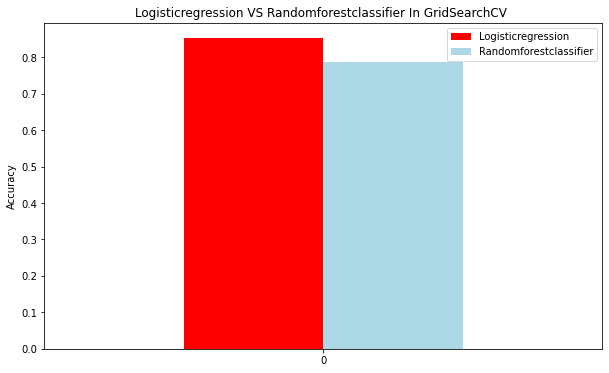

In [15]:
pd.DataFrame({'Logisticregression':scores_2,'Randomforestclassifier':score_of_rs_2},index=[0]).plot(kind="bar",color=["red","lightblue"],figsize=(10,6));

plt.title("Logisticregression VS Randomforestclassifier In GridSearchCV ");
plt.ylabel("Accuracy");
plt.xticks(rotation=0);


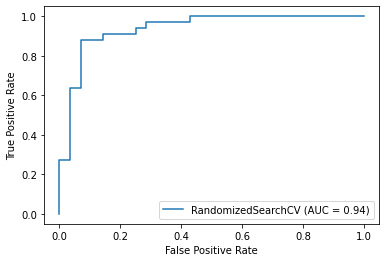

In [21]:
#Evaluating the perfect model RandomForestClassifier In RandomizedSearchCV

plot_roc_curve(rs_model,x_test,y_test);

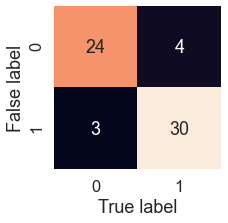

In [25]:
y_pred=rs_model.predict(x_test);



sns.set(font_scale=1.5)

def confusion(y_test,y_pred):
    fig,ax=plt.subplots(figsize=(3,3))
    s=confusion_matrix(y_test,y_pred);
    ax=sns.heatmap(s,cbar=False,annot=True)
    plt.xlabel("True label")
    plt.ylabel("False label")
confusion(y_test,y_pred)

In [26]:
print(classification_report(y_test,y_pred));

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [30]:


clf=RandomForestClassifier()
acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
final_1=acc.mean()
print(f"The accuray score of cross-validation: {final_1*100:.2f}%")

clf=RandomForestClassifier()
pre=cross_val_score(clf,x,y,cv=5,scoring="precision")
final_4=pre.mean()
print(f"The precision score of cross-validation: {final_4*100:.2f}%")

clf=RandomForestClassifier()
re=cross_val_score(clf,x,y,cv=5,scoring="recall")
final_2=re.mean()
print(f"The recall score of cross-validation: {final_2*100:.2f}%")

clf=RandomForestClassifier()
f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
final_3=f1.mean()
print(f"The f1-score score of cross-validation: {final_3*100:.2f}%")

The accuray score of cross-validation: 82.16%
The precision score of cross-validation: 81.77%
The recall score of cross-validation: 86.06%
The f1-score score of cross-validation: 83.21%


In [34]:
pd.DataFrame({"Accuracy":final_1,
             "Precision":final_4,
              "Recall":final_2,
              "F1-score":final_3
             
             },index=[0])

,Accuracy,Precision,Recall,F1-score
0,0.821585,0.817706,0.860606,0.83207


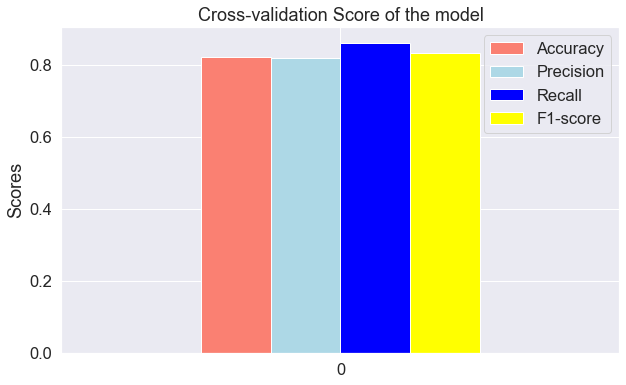

In [65]:
pd.DataFrame({"Accuracy":final_1,
             "Precision":final_4,
              "Recall":final_2,
              "F1-score":final_3
             
             },index=[0]).plot(kind="bar",color=["salmon","lightblue","blue","yellow"],figsize=(10,6));
plt.xticks(rotation=0)
plt.title("Cross-validation Score of the model")
plt.ylabel("Scores");

In [46]:
#feature importance

rs_model.best_params_

{'n_estimators': 460,
 'min_samples_split': 6,
 'min_samples_leaf': 11,
 'max_depth': 20}

In [53]:
clf=RandomForestClassifier(n_estimators=460 ,
 min_samples_split= 6,
 min_samples_leaf= 11,
 max_depth= 20)

clf.fit(x_train,y_train);



In [55]:
clf.feature_importances_

array([0.04212087, 0.03962245, 0.2167562 , 0.01552343, 0.0269011 ,
       0.00066208, 0.01334288, 0.12640179, 0.06943723, 0.11115361,
       0.05283554, 0.16353103, 0.12171177])

In [58]:
feature_dict=dict(zip(df.columns,list(clf.feature_importances_)))
feature_dict

{'age': 0.04212087445345782,
 'sex': 0.039622445879503795,
 'cp': 0.21675620015424651,
 'trestbps': 0.015523427021786627,
 'chol': 0.02690109812298796,
 'fbs': 0.0006620760144992816,
 'restecg': 0.013342884110893948,
 'thalach': 0.12640179470215337,
 'exang': 0.06943723439402685,
 'oldpeak': 0.11115361309769171,
 'slope': 0.05283554447552061,
 'ca': 0.16353103484757223,
 'thal': 0.12171177272565921}

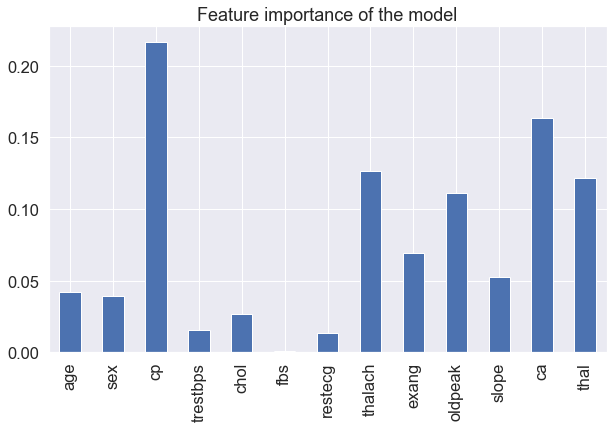

In [64]:
feature_graph=pd.DataFrame(feature_dict,index=[0])
feature_graph.T.plot.bar(title="Feature importance of the model",legend=False,figsize=(10,6));